<a href="https://colab.research.google.com/github/tocram1/ExercicesIA/blob/master/Cours_IA_S4_Master_CCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# On installe et charge Scipy
%pip install scipy
import scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Premier apprentissage
## 1. Chargement du jeu de données
Jeux de caractères manuscrits proposé par scikitlearn
Représentation des données

Clefs :  ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']
Data :  [ 0.  0.  0.  0. 12.  2.  0.  0.  0.  0.  0.  6. 14.  1.  0.  0.  0.  0.
  4. 16.  7.  8.  0.  0.  0.  0. 13.  9.  0. 16.  6.  0.  0.  6. 16. 10.
 11. 16.  0.  0.  0.  0.  5. 10. 13. 16.  0.  0.  0.  0.  0.  0.  6. 16.
  0.  0.  0.  0.  0.  0. 12.  8.  0.  0.]
Annotation : 4


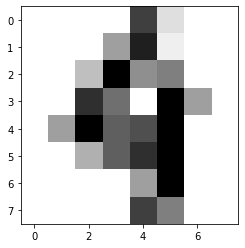

In [65]:
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

# un index quelconque
idx = 24

# list des clefs du dictionnaire
keyList = list(digits.keys())
print("Clefs : ",keyList)

# représentation d'un élément dans data
print("Data : ", digits.data[idx])

# annotation d'un élément de data
print("Annotation :",digits.target[idx])

import matplotlib.pyplot as plt

plt.imshow(digits.images[idx], cmap='gray_r')
plt.show() 

In [66]:
from sklearn.datasets import get_data_home
print(get_data_home())

/root/scikit_learn_data


## 2. Construction du jeu de données
Définition de la fonction split_train_test, son rôle est de mélanger le jeu de données et de le séparer en deux en fonction d'un ratio (par defaut 0.2 soit 20%). Le ratio exprime la partie réserver pour effectuer les calculs de performances du model.  
Elle prend en paramètre d'entrèe un tableau de vecteurs, où chaque vecteur représente une données et un tableau contenant les classes correspndantes à chaque vecteurs.

[6 9 3 ... 0 7 3]
Taille du jeu du jeu d'apprentissage (1437, 64) et taille du jeux de test (359, 64)

Caractère à la position 24 dans le jeu de données, il est annoté (5)


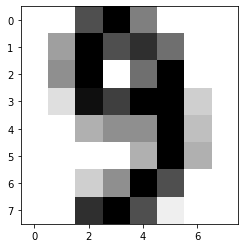

In [67]:
import numpy as np

def split_train_test( data, annotation, ratio=0.2, seed=42 ):
    np.random.seed(seed)
    liste = list(zip(data, annotation))
    np.random.shuffle(liste)
    data, annotation = zip(*liste)
    size_test = int( len(data) * (1-ratio) )
    return np.array(data[:size_test]), np.array(annotation[:size_test]),\
            np.array(data[size_test+1:]), np.array(annotation[size_test+1:])

trainX, trainY, testX, testY = split_train_test(digits.data, digits.target)

print(trainY)

print("Taille du jeu du jeu d'apprentissage {} et taille du jeux de test {}\n".format(trainX.shape, testX.shape))

# exemple du caractère à la position 24
idx = 24
print("Caractère à la position {} dans le jeu de données, il est annoté ({})".format( idx, trainY[idx]))
plt.imshow(trainX[1].reshape(8,8), cmap='gray_r')
plt.show()

## 3. Préparation des données
Les images sont en nuance de gris sur 16 valeurs, les neuronnes de notre modèle sont de type on/off, on va donc devoir convertir nos jeux  
Pour les annotations nous avons 10 classes la classe 0, classe 1 ... classe 9. Pour la même raison que les inputs on va devoir choisir une classe et redéfinir l'annotation à True pour la classe choisi et à False pour toutes les autres.

Caractère à la position 25 dans le jeu de données, il est annoté (True)


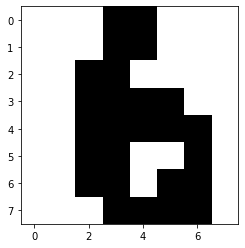

In [68]:
def modif_input( dataset, seuil = 4 ):
    for n in range(len(dataset)):
        for i in range(len(dataset[n])):
             dataset[n][i] = 1 if dataset[n][i] > seuil else 0
    return dataset

trainX = modif_input(trainX)
testX = modif_input(testX)

def modif_output( dataset, classe = 6 ):
    dataset = np.array(list(map( lambda x: x==classe, dataset )))
    return dataset

trainY = modif_output(trainY)
testY = modif_output(testY)

# exemple de caractère à la position 25
idx = 25
print("Caractère à la position {} dans le jeu de données, il est annoté ({})".format( idx, trainY[idx]))
plt.imshow(trainX[0].reshape(8,8), cmap='gray_r')
plt.show()

## 4. Modèle d'apprentissage basé sur HEBB
Fonction fit pour l'apprentissage par renforcement des poids, apprentissage binaire, appartient à une classe ou n'appartient pas, retour le tableau des poids du model.  
Fonction predict pour classer un tableau de vecteur donné.

In [69]:
import numpy as np

# apprentissage
def fit( X, Y ):
    weight = np.array([], float)
    # initialisation des poids
    for i in range(len(X[0])):
        weight = np.append( weight, 1 )
        
    # pour chaque vecteur du jeu de données
    for n in range(len(X)):
        for i in range(len(X[n])):
            weight[i] = weight[i] + X[n][i]*Y[n]
        
    return weight

# classification
def predict( X, weight, seuil = 2000 ):
    Y = []
    for n in range(len(X)):
        w = 0
        for i in range(len(X[n])):
            w = w + X[n][i]*weight[i]
        Y.append( w > seuil)
    return Y

## 5. Mesure de performance
Fonction calculant la précision et le rappel
Fonction calculant la moyenne harmonique de la précision et du rappel

In [70]:
from collections import Counter
    
def performance( test, predic ):
    couple = list(zip(test,predic))
    nbrCouple = Counter(couple)
    TruePositif = nbrCouple[(True,True)]
    FalsePositif = nbrCouple[(False,True)]
    TrueNegatif = nbrCouple[(False,False)]
    FalseNegatif = nbrCouple[(True,False)]
    preci = (TruePositif/(TruePositif+FalsePositif)) if ((TruePositif+FalsePositif)>0) else 0
    rappel = (TruePositif/(TruePositif+FalseNegatif)) if ((TruePositif+FalseNegatif)>0) else 0
    return preci, rappel

In [71]:
# Calcul des poids pour le jeu d'entraînement
w = fit(trainX, trainY)

print(w)

# Classification du jeu de test
prediction = predict(testX, w, 2000)

# Evaluation de la performance du modèle
preci, rappel = performance(testY, prediction)
print("Précision du modèle : {:.2f}%\nSensibilité (rappel) : {:.2f}%"
    .format(preci*100, rappel*100))

[  1.   1.  11. 148. 111.  19.   1.   1.   1.   1. 112. 151.  87.   7.
   2.   1.   1.   3. 141. 116.  11.   2.   1.   1.   1.  36. 148.  99.
  44.  26.   3.   1.   1.  53. 151. 141. 138. 124.  43.   1.   1.  14.
 151. 128.  72. 132. 131.   3.   1.   1. 145. 147.  76. 137. 139.   8.
   1.   1.  12. 147. 151. 150.  67.   1.]
Précision du modèle : 9.75%
Sensibilité (rappel) : 100.00%


In [72]:
# Fonction de score harmonique
def score_h(preci, rappel):
    return (2/((1/preci)+(1/rappel))) if ((preci and rappel) != 0) else 0

# Fonction de score normal
def score(preci, rappel):
    return ((preci + rappel)/2) if ((preci and rappel) != 0) else 0

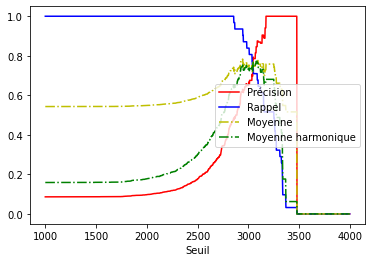

In [73]:
seuils = range(1000, 4000)
precisions = []
rappels = []
scores = []
scoresH = []

for seuil in seuils:
    prediction = predict(testX, w, seuil)
    preci, rappel = performance(testY, prediction)
    precisions.append(preci)
    rappels.append(rappel)
    scores.append(score(preci, rappel))
    scoresH.append(score_h(preci, rappel))

plt.plot(seuils, precisions,"r-", label="Précision")
plt.plot(seuils, rappels, "b-", label="Rappel")
plt.plot(seuils, scores, "y-.", label="Moyenne")
plt.plot(seuils, scoresH, "g-.", label="Moyenne harmonique")
plt.legend()
plt.xlabel("Seuil")
plt.show()

## 6. Calcul de la courbe ROC

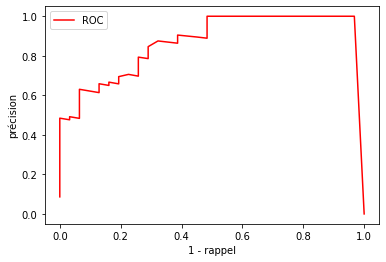

In [74]:
rappels2 = [1 - n for n in rappels]

plt.plot(rappels2, precisions, "r-", label="ROC")
plt.legend()
plt.xlabel("1 - rappel")
plt.ylabel("précision")
plt.show()

## 7. Exemple de descente de gradient
Ceci est un exemple nous montrant comment fonctionne la descente de gradients.

### Calcul des minimums d'un polynôme par itération
F(x) = (x-1)(x-2)(x-3)(x-5)

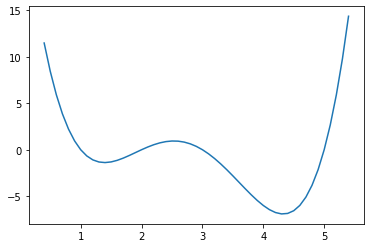

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt
import math

# Défintion de la function F(x) = (x-1)(x-2)(x-3)(x-5) 
def function( x ):
    y = (x-1)*(x-2)*(x-3)*(x-5)
    return y

# Initialisation d'un tableau de valeurs X entre 0.4 et 5.5 avec un pas de de 0.1
# [ 0.4, 0,5, ... , 5.4, 5.5]
X =  [ i/10 for i in range(4,55) ]

# Initialisation du tableau des valeurs Y = F(X)
Y = [ function(x) for x in X ]
    
# On trace la courbe
plt.plot(X,Y)
plt.show()

### Descente de gradient :

Recherche du minimum, revient à chercher F'(x)=0  
F'(x) = 4x^3 - 33x^2 + 82x – 61

Suite permettant de trouver le minium de manière itérative  
Xi+1 = Xi - u*F'(Xi)

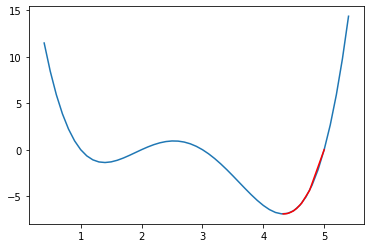

In [76]:
# Dérivée de la fonction
def derive( x ) :
    y = 4*math.pow(x,3)-33*x**2+82*x-61
    return y

# Initialisation des valeurs pour l'algorithme de descente de gradient
precision = 0.0001 # le minimum trouver sera proche au 10 millième près
pas = 0.01 # vitesse de rapprochement au minimum (ou pas de l'itération)
xi = 5; # valeur de départ
xi1 =  xi - pas*derive(xi) # initialisation de la première itération
SX = [xi] # tableau de sauvegarde de chaques Xi calculés pour affichage

# boucle itération, s'arrête lorsque la précision a été atteinte
# La valeur absolue pour supprimer les problèmes de signe ( on peut aussi élever au carré)
while math.fabs(xi1 - xi) > precision :
    SX.append(xi1) # sauvegarde pour affichage
    # calcule de la suite
    xi = xi1
    xi1 = xi1 - pas*derive(xi1)

# Calcule de l'ordonné (les Yi) de chaques Xi
SY = [ function(x) for x in SX ]   

plt.plot(X,Y) # affichage de la courbe
plt.plot(SX,SY,"r-") # affichage de la descente de gradiant en rouge en reliant les points
plt.show()

### Cosmétique
Zoom sur les parties de courbe intéressante, il suffit de réduire l'intervale des points en abscisse.  
Et on agrandi la figure

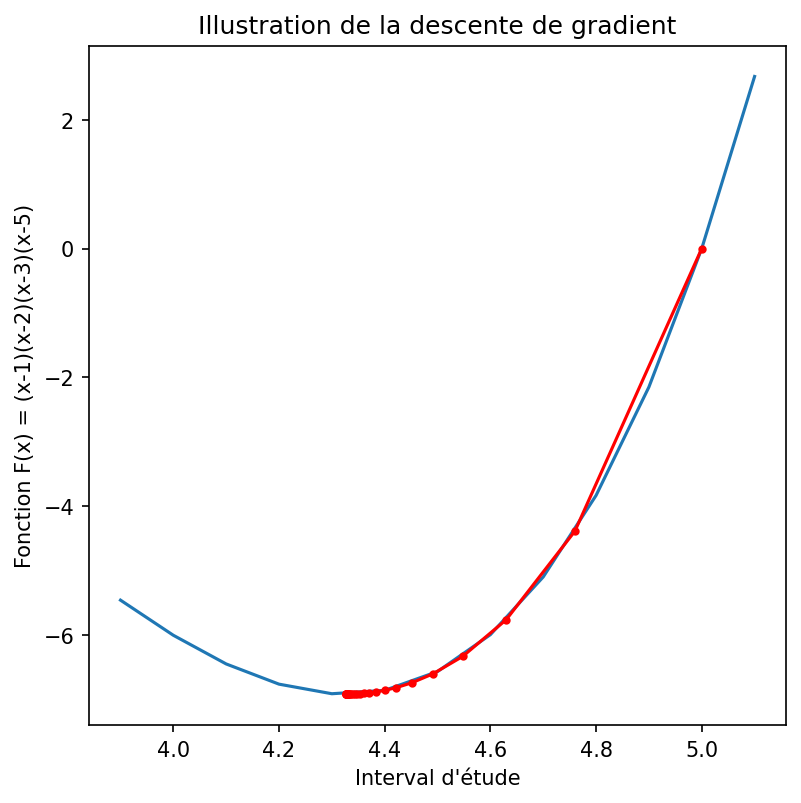

In [77]:
fig = plt.figure(figsize=(6,6), dpi=150)
ax = fig.add_subplot(111)
ax.set(xlabel='Interval d\'étude',
       ylabel='Fonction F(x) = (x-1)(x-2)(x-3)(x-5)',
       title='Illustration de la descente de gradient')
XZoom = X[35:48]
YZoom = [ function(x) for x in XZoom ]
ax.plot(XZoom,YZoom)
ax.plot(SX,SY,"r-")
ax.plot(SX,SY,"r.")

plt.show()

### Interprétation
Après avoir interpréter ce premier graphique testez les valeurs de pas { 0.05, 0.08, 0.1 }  
Que ce passe t'il pour un pas de 0.1 ?  
Quelle solution proposez vous ?  
Tester ensuite les valeurs { 0.1, 0.17, 0.2 }  
Interpréter les résultats.

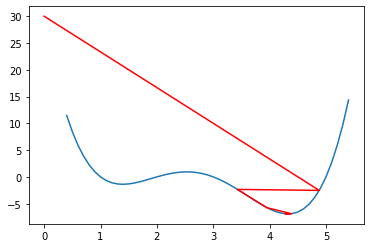

In [78]:
# Initialisation des autres valeurs pour l'algorithme de descente de gradient
precision = 0.0001 # le minimum trouver sera proche au 10 millième près
pas = 0.08 # vitesse de rapprochement au minimum (ou pas de l'itération)
xi = 0; # valeur de départ
xi1 =  xi - pas*derive(xi) # initialisation de la première itération
SX = [xi] # tableau de sauvegarde de chaques Xi calculés pour affichage

# boucle itération, s'arrête lorsque la précision a été atteinte
# La valeur absolue pour supprimer les problèmes de signe ( on peut aussi élever au carré)
iter = 0
while math.fabs(xi1 - xi) > precision and iter < 100:
    SX.append(xi1) # sauvegarde pour affichage
    # calcule de la suite
    xi = xi1
    xi1 = xi1 - pas*derive(xi1)
    iter += 1

# Calcule de l'ordonné (les Yi) de chaques Xi
SY = [ function(x) for x in SX ]   

plt.plot(X,Y) # affichage de la courbe
plt.plot(SX,SY,"r-") # affichage de la descente de gradiant en rouge en reliant les points
plt.show()